In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import phate
import torch

# Visualization of latent space

In [64]:
with open('latent_embeddings1ptq_notime.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_rep = pk.load(file)

with open('times_1ptq_notime.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

In [3]:
with open('times_murd_open.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times_open = pk.load(file)

with open('times_murd_closed.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times_closed = pk.load(file)

In [65]:
z_rep = torch.cat(z_rep, dim=0)

In [66]:
z_rep.shape

torch.Size([1001, 64])

In [6]:
with open('latent_embeddingsmurd_open.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_open = pk.load(file)

with open('latent_embeddingsmurd_closed.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_closed = pk.load(file)

z_open = torch.cat(z_open, dim=0)
z_closed = torch.cat(z_closed, dim=0)
# Create labels (0 for open, 1 for closed)
# labels = np.array([0] * len(z_open) + [1] * len(z_closed))

In [7]:
z_stacked = torch.cat([z_open, z_closed], dim=0)

In [8]:
z_stacked.shape

torch.Size([1800, 64])

In [9]:
z_stacked = torch.cat([z_stacked, z_rep], dim=0)

In [9]:
z_stacked.shape

torch.Size([1800, 64])

In [9]:
labels = np.array([0] * len(z_open) + [1] * len(z_closed))

In [27]:
labels = np.concatenate([labels, np.array([2] * len(z_rep))])

Calculating PHATE...
  Running PHATE on 1800 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.96 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.09 seconds.
Calculated PHATE in 4.50 seconds.


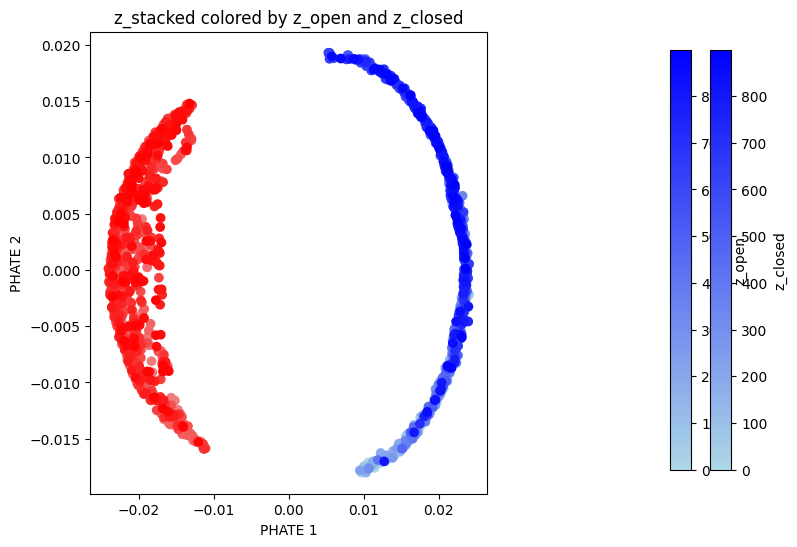

In [30]:
import phate

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_stacked)
red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['lightcoral', 'red'])
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['lightblue', 'blue'])
# Visualize the latent representation
plt.figure(figsize=(8, 6))
# plt.scatter(z_phate[:, 0], z_phate[:, 1], c=labels, cmap='viridis')
plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times[:900], cmap=red_cmap)
plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times[900:1800], cmap=blue_cmap)
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('z_stacked colored by z_open and z_closed')
# Create the first colorbar for z_open
cbar1 = plt.colorbar(label='z_open', ax=plt.gca())
# Create the second colorbar for z_closed
cbar2 = plt.colorbar(label='z_closed', ax=plt.gca())

# Adjust the position of the colorbars
cbar1.ax.set_position([0.85, 0.15, 0.03, 0.7])
cbar2.ax.set_position([0.9, 0.15, 0.03, 0.7])
# plt.colorbar(label='z_open and z_closed')
plt.show()

Calculating PHATE...
  Running PHATE on 1800 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 1.00 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.37 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.40 seconds.
Calculated PHATE in 4.88 seconds.


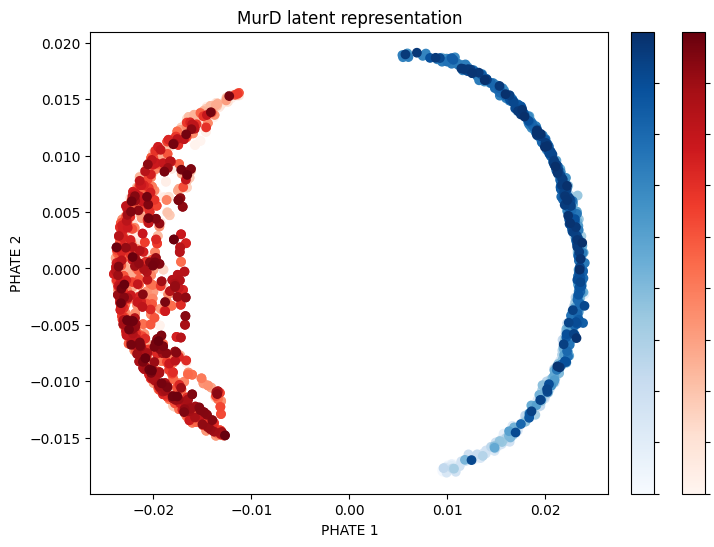

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import phate

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_stacked)
red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['lightcoral', 'red'])
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['lightblue', 'blue'])

# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Reds')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation')
# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Reds')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation')
# Remove ticks from the colorbar
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('')
cbar1.ax.set_yticklabels([])
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='Blues')
# Remove ticks from the colorbar
cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('')
cbar2.ax.set_yticklabels([])
plt.show()
# # Create the first colorbar for z_open
# cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
# cbar1.set_label('z_open')

# # Plot for z_closed with blue colormap
# scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times[900:1800], cmap=blue_cmap)

# # Create the second colorbar for z_closed
# cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
# cbar2.set_label('z_closed')

# plt.show()

Calculating PHATE...
  Running PHATE on 1001 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 0.23 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.08 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.64 seconds.
Calculated PHATE in 1.02 seconds.


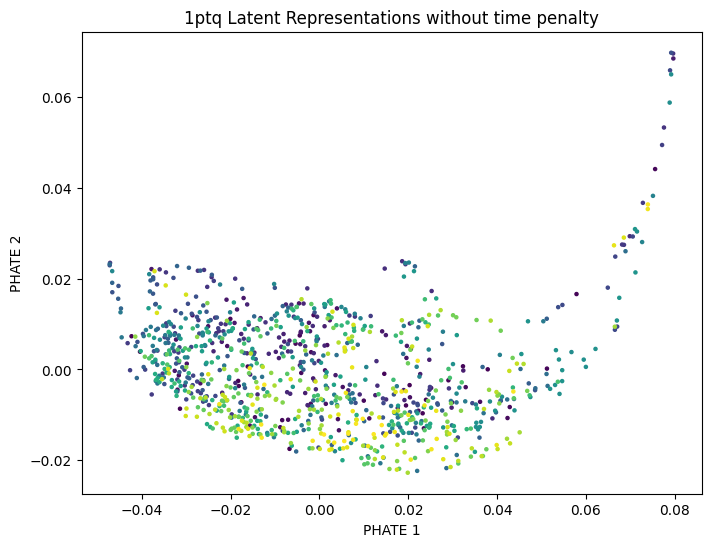

In [67]:
# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_rep)

# Visualize the latent representation
plt.figure(figsize=(8, 6))
plt.scatter(z_phate[:, 0], z_phate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('1ptq Latent Representations without time penalty')
plt.show()


Calculating TPHATE...
  Running TPHATE on 1000 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Learning the autocorrelation function...
  Calculating Autocorr kernel...
    Dropoff point: 276
  Combining PHATE operator and autocorr operator
  Calculating optimal t...
    Automatically selected t = 34
  Calculated optimal t in 0.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.16 seconds.
Calculated TPHATE in 2.14 seconds.


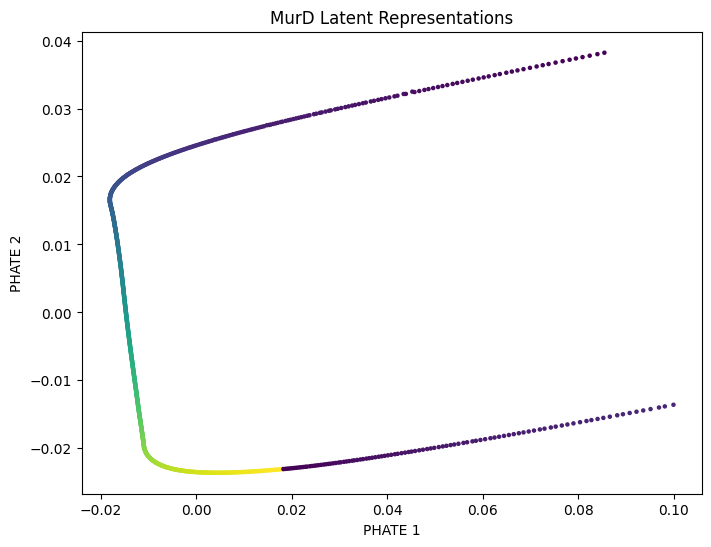

In [9]:
import tphate

tphate_op = tphate.TPHATE(n_components=2)
data_tphate = tphate_op.fit_transform(z_rep)

plt.figure(figsize=(8, 6))
plt.scatter(data_tphate[:, 0], data_tphate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD Latent Representations')
plt.show()

# Sample from Latent Space

Calculating PHATE...
  Running PHATE on 1800 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.31 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.44 seconds.
Calculated PHATE in 4.78 seconds.


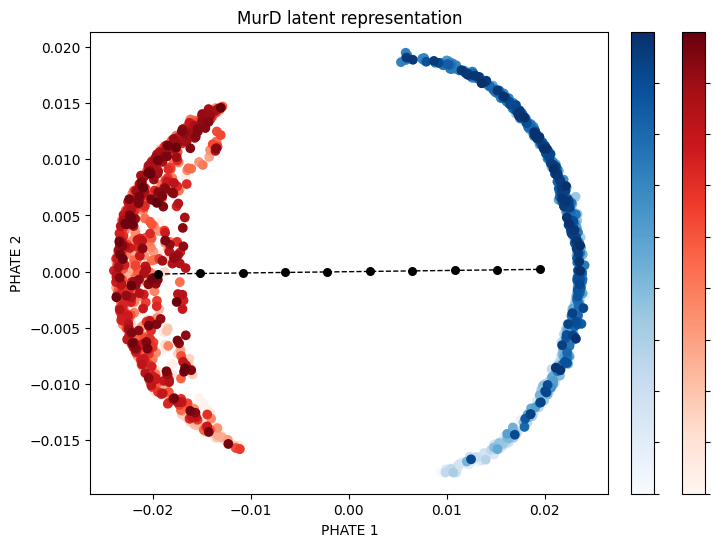

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import phate

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_stacked)
red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['lightcoral', 'red'])
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['lightblue', 'blue'])

# Find the centroids of the red and blue clusters
centroid_red = np.mean(z_phate[:900], axis=0)
centroid_blue = np.mean(z_phate[900:1800], axis=0)

# Calculate the line between the centroids
num_samples = 10  # Number of points to sample along the line
line_samples = np.linspace(centroid_red, centroid_blue, num=num_samples)

# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Reds')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='Blues')

# Plot the line and sampled points
plt.plot(line_samples[:, 0], line_samples[:, 1], 'k--', linewidth=1)  # Dashed line between centroids
plt.scatter(line_samples[:, 0], line_samples[:, 1], c='black', s=30)  # Sampled points along the line

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation')

# Remove ticks from the colorbars
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('')
cbar1.ax.set_yticklabels([])

cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('')
cbar2.ax.set_yticklabels([])

plt.show()


In [10]:
with open('latent_embeddingsmurd_GT.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_GT = pk.load(file)

with open('times_murd_GT.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times_GT = pk.load(file)

In [11]:
with open('latent_embeddingsmurd_GT_5F.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_GT_5F = pk.load(file)

with open('times_murd_GT_5F.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times_GT_5F = pk.load(file)

In [12]:
z_GT = torch.cat(z_GT, dim=0)

In [13]:
z_GT_5F = torch.cat(z_GT_5F, dim=0)

Calculating PHATE...
  Running PHATE on 1800 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.91 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.30 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.35 seconds.
Calculated PHATE in 4.67 seconds.
Calculating KNN search...
Calculating affinities...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/phate/phate.py:884: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(


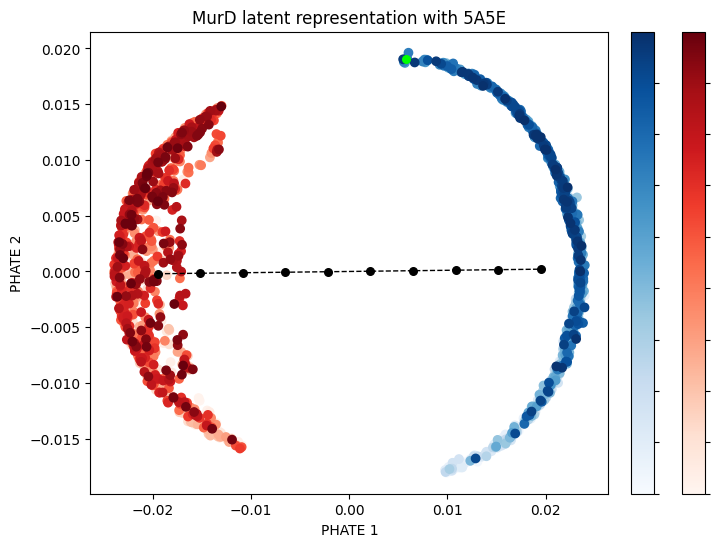

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import phate

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_stacked)
# red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['lightcoral', 'red'])
# blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['lightblue', 'blue'])
# yellow_cmap = LinearSegmentedColormap.from_list('yellow_cmap', ['lightyellow', 'yellow'])

# Fit and transform the intermediate conformation
z_GT_phate = phate_operator.transform(z_GT)

# Find the centroids of the red and blue clusters
centroid_red = np.mean(z_phate[:900], axis=0)
centroid_blue = np.mean(z_phate[900:1800], axis=0)

# Calculate the line between the centroids
num_samples = 10  # Number of points to sample along the line
line_samples = np.linspace(centroid_red, centroid_blue, num=num_samples)

# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Reds')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='Blues')
# Plot for z_GT with yellow colormap
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=30)

# Plot the line and sampled points
plt.plot(line_samples[:, 0], line_samples[:, 1], 'k--', linewidth=1)  # Dashed line between centroids
plt.scatter(line_samples[:, 0], line_samples[:, 1], c='black', s=30)  # Sampled points along the line

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')

# Remove ticks from the colorbars
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('')
cbar1.ax.set_yticklabels([])

cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('')
cbar2.ax.set_yticklabels([])

plt.show()


Calculating PHATE...
  Running PHATE on 1801 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.10 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.85 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.07 seconds.
Calculated PHATE in 4.38 seconds.
(1800, 2)


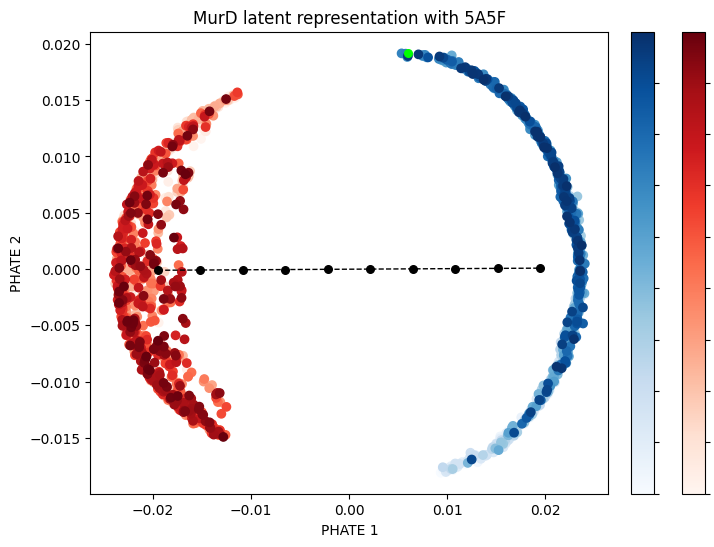

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import phate

# Combine z_stacked and z_GT into a single dataset
z_combined = torch.cat([z_stacked, z_GT_5F], dim=0)

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the combined latent representation
z_combined_phate = phate_operator.fit_transform(z_combined)

# Split the transformed data back into z_stacked and z_GT
z_phate = z_combined_phate[:len(z_stacked)]
z_GT_phate = z_combined_phate[len(z_stacked):]

# red_cmap = LinearSegmentedColormap.from_list('red_cmap', ['lightcoral', 'red'])
# blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', ['lightblue', 'blue'])
# yellow_cmap = LinearSegmentedColormap.from_list('yellow_cmap', ['lightyellow', 'yellow'])

print(z_phate.shape)
# Find the centroids of the red and blue clusters
centroid_red = np.mean(z_phate[:900], axis=0)
centroid_blue = np.mean(z_phate[900:1800], axis=0)

# Calculate the line between the centroids
num_samples = 10  # Number of points to sample along the line
line_samples = np.linspace(centroid_red, centroid_blue, num=num_samples)

# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Reds')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='Blues')
# Plot for z_GT with yellow colormap
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=30)

# Plot the line and sampled points
plt.plot(line_samples[:, 0], line_samples[:, 1], 'k--', linewidth=1)  # Dashed line between centroids
plt.scatter(line_samples[:, 0], line_samples[:, 1], c='black', s=30)  # Sampled points along the line

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5F')

# Remove ticks from the colorbars
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('')
cbar1.ax.set_yticklabels([])

cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('')
cbar2.ax.set_yticklabels([])

plt.show()


Calculating PHATE...
  Running PHATE on 1811 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.15 seconds.
  Calculating optimal t...
    Automatically selected t = 46
  Calculated optimal t in 1.72 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.34 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.73 seconds.
Calculated PHATE in 5.95 seconds.
900 900 1
(10, 64)


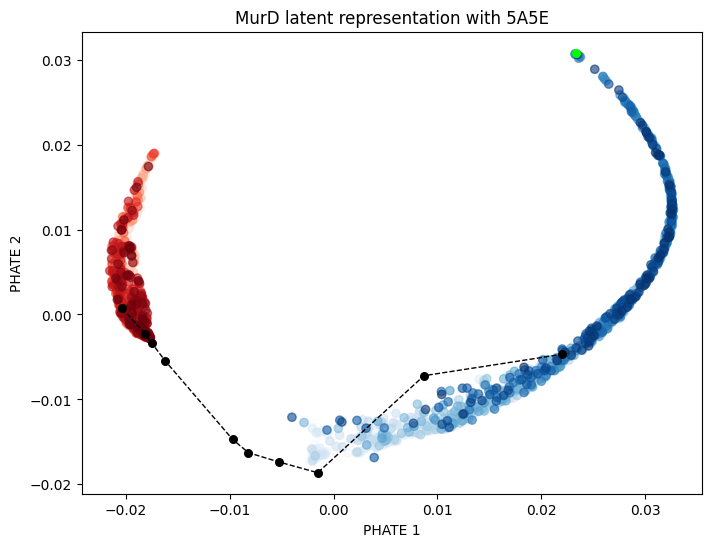

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import phate
import torch

# Perform linear interpolation in high-dimensional space
def linear_interpolation(p1, p2, num_samples):
    return np.linspace(p1, p2, num_samples)

# Assuming z_open, z_closed, and z_GT are your points with shape (900, 64), (900, 64), and (1, 64) respectively
# Convert tensors to numpy arrays if they are in tensor format
z_open = z_open.numpy() if torch.is_tensor(z_open) else z_open
z_closed = z_closed.numpy() if torch.is_tensor(z_closed) else z_closed
z_GT = z_GT.numpy() if torch.is_tensor(z_GT) else z_GT

# Calculate centroids
centroid_open = np.mean(z_open, axis=0)
centroid_closed = np.mean(z_closed, axis=0)

# Generate interpolated points in the high-dimensional space
num_samples = 10
interpolated_points = linear_interpolation(centroid_open, centroid_closed, num_samples)

# Combine the original points and the interpolated points
z_combined = np.concatenate([z_open, z_closed, z_GT, interpolated_points], axis=0)

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the combined latent representation
z_combined_phate = phate_operator.fit_transform(z_combined)

# Split the transformed data back into z_open, z_closed, z_GT, and interpolated points
print(len(z_open), len(z_closed), len(z_GT))
print(interpolated_points.shape)
z_open_phate = z_combined_phate[:len(z_open)]
z_closed_phate = z_combined_phate[len(z_open):len(z_open) + len(z_closed)]
z_GT_phate = z_combined_phate[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]
interpolated_phate = z_combined_phate[len(z_open) + len(z_closed) + len(z_GT):]

# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_open_phate[:, 0], z_open_phate[:, 1], c=times_open, cmap='Reds', alpha=0.6, label='Open')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_closed_phate[:, 0], z_closed_phate[:, 1], c=times_closed, cmap='Blues', alpha=0.6, label='Closed')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=30, label='GT')

# Plot the interpolated points
plt.plot(interpolated_phate[:, 0], interpolated_phate[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed line
plt.scatter(interpolated_phate[:, 0], interpolated_phate[:, 1], c='black', s=30)  # Sampled points along the line

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')
# plt.legend()

plt.show()


Calculating PHATE...
  Running PHATE on 1801 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.15 seconds.
  Calculating optimal t...


    Automatically selected t = 29
  Calculated optimal t in 2.00 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.61 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.33 seconds.
Calculated PHATE in 6.11 seconds.
(10, 2)


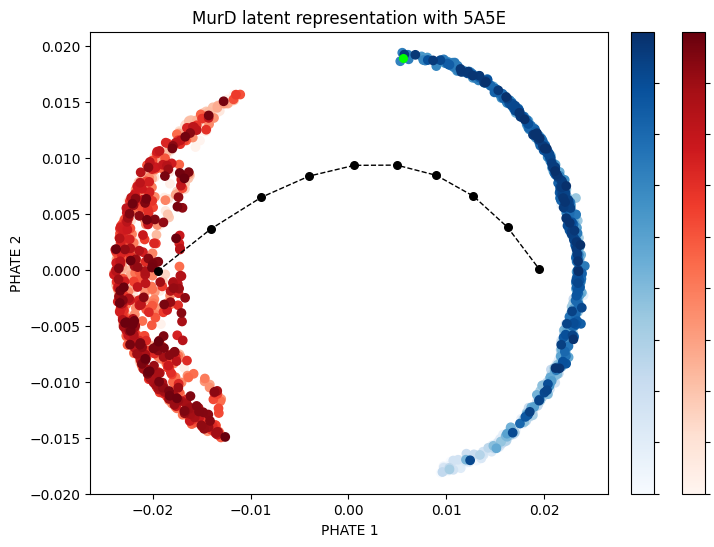

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import phate

# Combine z_stacked and z_GT into a single dataset
z_combined = torch.cat([z_stacked, z_GT], dim=0)

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the combined latent representation
z_combined_phate = phate_operator.fit_transform(z_combined)

# Split the transformed data back into z_stacked and z_GT
z_phate = z_combined_phate[:len(z_stacked)]
z_GT_phate = z_combined_phate[len(z_stacked):]

# Find the centroids of the red and blue clusters
centroid_red = np.mean(z_phate[:900], axis=0)
centroid_blue = np.mean(z_phate[900:1800], axis=0)
gt_point = z_GT_phate[0]  # Assuming a single ground truth point

# Define the quadratic Bezier curve
def bezier(t, p0, p1, p2):
    return (1 - t)**2 * p0 + 2 * (1 - t) * t * p1 + t**2 * p2

# Generate points along the Bezier curve
t_values = np.linspace(0, 1, 10)
arc_points = np.array([bezier(t, centroid_red, gt_point, centroid_blue) for t in t_values])
print(arc_points.shape)
# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Reds')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='Blues')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=30)

# Plot the arc and sampled points
plt.plot(arc_points[:, 0], arc_points[:, 1], 'k--', linewidth=1)  # Dashed arc line
plt.scatter(arc_points[:, 0], arc_points[:, 1], c='black', s=30)  # Sampled points along the arc

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')

# Remove ticks from the colorbars
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('')
cbar1.ax.set_yticklabels([])

cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('')
cbar2.ax.set_yticklabels([])

plt.show()


(10, 64)
Calculating PHATE...
  Running PHATE on 1811 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.15 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.94 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.32 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.59 seconds.
Calculated PHATE in 5.01 seconds.
(1, 2)


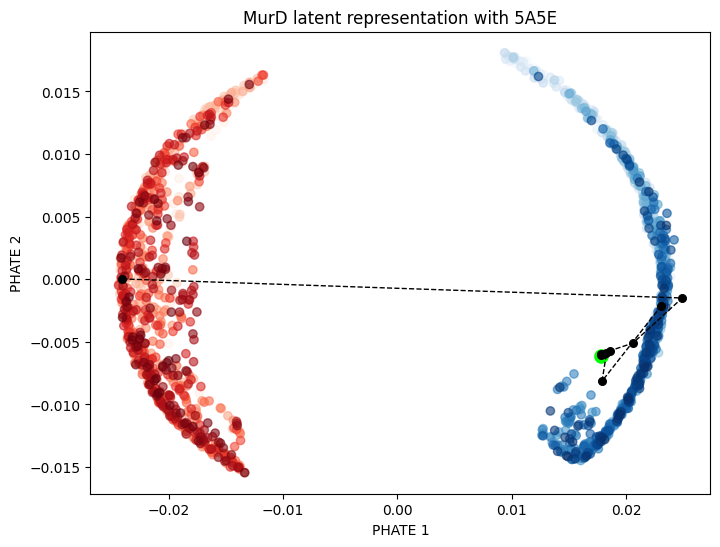

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import phate
import torch

# Define the quadratic Bezier curve
def quadratic_interpolant(p1, p2, p3, t):

    return (1-t)**2 * p1 + 2*(1-t)*t * p2 + t**2 * p3

def generate_samples(p1, p2, p3, n):

    t_values = np.linspace(0, 1, n)
    samples = [quadratic_interpolant(p1, p2, p3, t) for t in t_values]
    return np.array(samples)

# Example usage:
# Assuming z_open, z_closed, and z_GT are your points with shape (64,)
# z_open = np.random.rand(900, 64)
# z_closed = np.random.rand(900, 64)
# z_GT = np.random.rand(1, 64)

# Calculate centroids
centroid_open = np.array(z_open.mean(axis=0))
centroid_closed = np.array(z_closed.mean(axis=0))
gt_point = np.array(z_GT[0])
# print(gt_point.shape)
# Generate interpolated points in the high-dimensional space
num_samples = 10
interpolated_points = generate_samples(centroid_open, gt_point, centroid_closed, n=num_samples)

print(interpolated_points.shape)
# Combine the original points and the interpolated points
z_combined = np.concatenate([z_open, z_closed, z_GT, interpolated_points], axis=0)

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the combined latent representation
z_combined_phate = phate_operator.fit_transform(z_combined)

# Split the transformed data back into z_open, z_closed, z_GT, and interpolated points
z_open_phate = z_combined_phate[:len(z_open)]
z_closed_phate = z_combined_phate[len(z_open):len(z_open) + len(z_closed)]
z_GT_phate = z_combined_phate[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]
interpolated_phate = z_combined_phate[len(z_open) + len(z_closed) + len(z_GT):]

# Visualize the latent representation
plt.figure(figsize=(8, 6))
print(z_GT_phate.shape)
# Plot for z_open with red colormap
scatter1 = plt.scatter(z_open_phate[:, 0], z_open_phate[:, 1], c=times_open, cmap='Reds', alpha=0.6, label='Open')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_closed_phate[:, 0], z_closed_phate[:, 1], c=times_closed, cmap='Blues', alpha=0.6, label='Closed')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=90, label='GT')

# Plot the interpolated points
plt.plot(interpolated_phate[:, 0], interpolated_phate[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed arc line
plt.scatter(interpolated_phate[:, 0], interpolated_phate[:, 1], c='black', s=30)  # Sampled points along the arc

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')
# plt.legend()

plt.show()


Calculating PHATE...
  Running PHATE on 1901 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.15 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.16 seconds.
  Calculating optimal t...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 1800 and 1900. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Automatically selected t = 27
  Calculated optimal t in 1.23 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.34 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.99 seconds.
Calculated PHATE in 5.73 seconds.


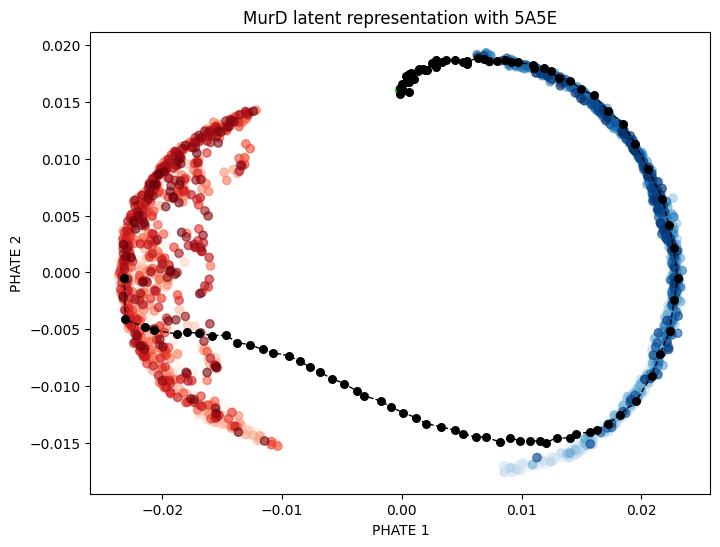

In [29]:
import numpy as np

# Assuming z_open and z_closed are numpy arrays with shapes (900, 64)

centroid_open = np.array(z_open.mean(axis=0))
centroid_closed = np.array(z_closed.mean(axis=0))
gt_point = np.array(z_GT[0])

def lagrange_basis(t, t_points):
    L0 = (t - t_points[1]) * (t - t_points[2]) / ((t_points[0] - t_points[1]) * (t_points[0] - t_points[2]))
    L1 = (t - t_points[0]) * (t - t_points[2]) / ((t_points[1] - t_points[0]) * (t_points[1] - t_points[2]))
    L2 = (t - t_points[0]) * (t - t_points[1]) / ((t_points[2] - t_points[0]) * (t_points[2] - t_points[1]))
    return L0, L1, L2

t_points = [0, 1, 2]
interpolated_points = []

for t in np.linspace(0, 2, 100):
    L0, L1, L2 = lagrange_basis(t, t_points)
    P_t = L0 * centroid_open + L1 * centroid_closed + L2 * z_GT
    interpolated_points.append(P_t)

interpolated_points = np.array(interpolated_points).reshape(100, 64)

import phate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Combine all data points
all_data = np.vstack([z_open, z_closed, z_GT, interpolated_points])

# Visualization using PHATE
phate_operator = phate.PHATE()
z_combined_phate = phate_operator.fit_transform(all_data)



# Split the transformed data back into z_open, z_closed, z_GT, and interpolated points
z_open_phate = z_combined_phate[:len(z_open)]
z_closed_phate = z_combined_phate[len(z_open):len(z_open) + len(z_closed)]
z_GT_phate = z_combined_phate[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]
interpolated_phate = z_combined_phate[len(z_open) + len(z_closed) + len(z_GT):]

# Visualize the latent representation
plt.figure(figsize=(8, 6))
# print(z_GT_phate.shape)
# Plot for z_open with red colormap
scatter1 = plt.scatter(z_open_phate[:, 0], z_open_phate[:, 1], c=times_open, cmap='Reds', alpha=0.6, label='Open')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_closed_phate[:, 0], z_closed_phate[:, 1], c=times_closed, cmap='Blues', alpha=0.6, label='Closed')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=50, label='GT')

# Plot the interpolated points
plt.plot(interpolated_phate[:, 0], interpolated_phate[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed arc line
plt.scatter(interpolated_phate[:, 0], interpolated_phate[:, 1], c='black', s=30)  # Sampled points along the arc

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')
# plt.legend()

plt.show()

# pca = PCA(n_components=2)

# all_data_pca = pca.fit_transform(all_data)
# # Split the transformed data back into z_open, z_closed, z_GT, and interpolated points

# z_open_pca = all_data_pca[:len(z_open)]

# z_closed_pca = all_data_pca[len(z_open):len(z_open) + len(z_closed)]

# z_GT_pca = all_data_pca[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]

# interpolated_pca = all_data_pca[len(z_open) + len(z_closed) + len(z_GT):]
# # Visualize the latent representation

# plt.figure(figsize=(8, 6))
# # Plot for z_open with red colormap
# scatter1 = plt.scatter(z_open_pca[:, 0], z_open_pca[:, 1], c=times_open, cmap = 'Reds', alpha=0.6, label='Open')
# # Plot for z_closed with blue colormap
# scatter2 = plt.scatter(z_closed_pca[:, 0], z_closed_pca[:, 1], c=times_closed, cmap = 'Blues', alpha=0.6, label='Closed')
# # Plot for z_GT with limegreen color
# scatter3 = plt.scatter(z_GT_pca[:, 0], z_GT_pca[:, 1], c='lime', s=50, label='GT')

# # Plot the interpolated points
# plt.plot(interpolated_pca[:, 0], interpolated_pca[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed arc line

# plt.scatter(interpolated_pca[:, 0], interpolated_pca[:, 1], c='black', s=30)  # Sampled points along the arc
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title('MurD latent representation with 5A5E')
# plt.legend()
# plt.show()




Calculating PHATE...
  Running PHATE on 1802 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.87 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.05 seconds.
Calculated PHATE in 4.39 seconds.


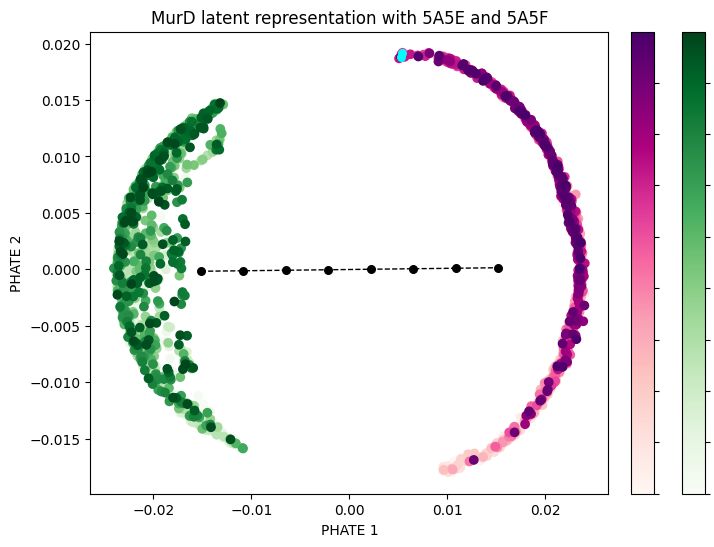

In [15]:
# Combine z_stacked, z_GT, and z_GT_5F into a single dataset
z_combined = np.concatenate([z_stacked, z_GT, z_GT_5F], axis=0)

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the combined latent representation
z_combined_phate = phate_operator.fit_transform(z_combined)

# Split the transformed data back into z_stacked, z_GT, and z_GT_5F
z_phate = z_combined_phate[:len(z_stacked)]
z_GT_phate = z_combined_phate[len(z_stacked):len(z_stacked) + len(z_GT)]
z_GT_5F_phate = z_combined_phate[len(z_stacked) + len(z_GT):]

# Find the centroids of the red and blue clusters
centroid_red = np.mean(z_phate[:900], axis=0)
centroid_blue = np.mean(z_phate[900:1800], axis=0)

# Calculate the line between the centroids
num_samples = 10  # Number of points to sample along the line
line_samples = np.linspace(centroid_red, centroid_blue, num=num_samples)

# Visualize the latent representation
plt.figure(figsize=(8, 6))

# Plot for z_open with red colormap
scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Greens')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='RdPu')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='aqua', s=30)
# Plot for z_GT_5F with lightyellow color
scatter4 = plt.scatter(z_GT_5F_phate[:, 0], z_GT_5F_phate[:, 1], c='aqua', s=30)

# Plot the line and sampled points
plt.plot(line_samples[1:9, 0], line_samples[1:9, 1], 'k--', linewidth=1)  # Dashed line between centroids
plt.scatter(line_samples[1:9, 0], line_samples[1:9, 1], c='black', s=30)  # Sampled points along the line

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E and 5A5F')

# Remove ticks from the colorbars
cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar1.set_label('')
cbar1.ax.set_yticklabels([])

cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
cbar2.set_label('')
cbar2.ax.set_yticklabels([])

plt.show()

In [19]:
z_phate.shape

(3600, 2)

In [17]:
line_samples

array([[ 0.02089779,  0.00826677],
       [ 0.01701446,  0.00925826],
       [ 0.01313113,  0.01024975],
       [ 0.00924779,  0.01124124],
       [ 0.00536446,  0.01223273],
       [ 0.00148112,  0.01322422],
       [-0.00240221,  0.01421571],
       [-0.00628555,  0.0152072 ],
       [-0.01016888,  0.01619869],
       [-0.01405222,  0.01719018]])

In [15]:
z_open.dtype

torch.float32

In [16]:
# Calculate the centroids of the red and blue clusters
centroid_open = z_open.mean(dim=0)
centroid_closed = z_closed.mean(dim=0)

# Sample points along the line between the centroids in the original latent space
num_samples = 100  # Number of points to sample along the line
line_samples_latent = np.linspace(centroid_open, centroid_closed, num=num_samples)

In [17]:
line_samples_latent.shape

(100, 64)

In [33]:
import pickle

# Define the file path to save the pickle file
file_path = 'line_samples_latent.pkl'

# Save the variable as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(line_samples_latent, file)

NameError: name 'line_samples_latent' is not defined

# Arc Interpolation passing through GT

Calculating PHATE...
  Running PHATE on 1801 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.90 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.35 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.15 seconds.
Calculated PHATE in 4.55 seconds.


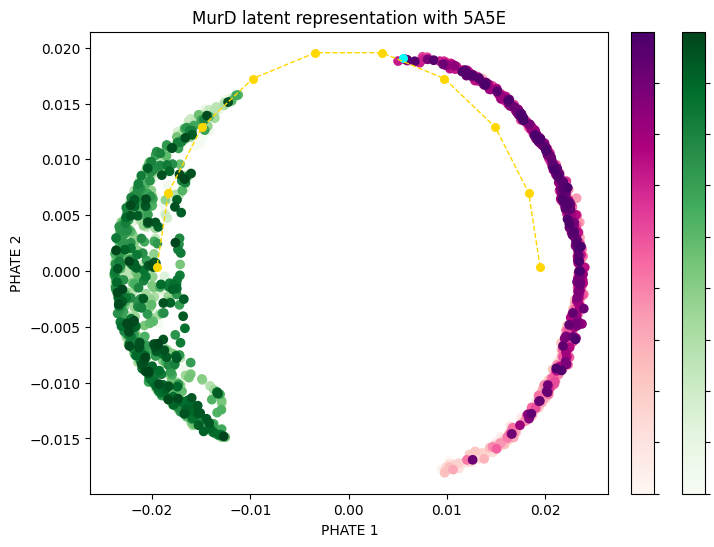

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import phate

# Combine z_stacked and z_GT into a single dataset
z_combined = torch.cat([z_stacked, z_GT], dim=0)

# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the combined latent representation
z_combined_phate = phate_operator.fit_transform(z_combined)

# Split the transformed data back into z_stacked and z_GT
z_phate = z_combined_phate[:len(z_stacked)]
z_GT_phate = z_combined_phate[len(z_stacked):]

# Find the centroids of the red and blue clusters
centroid_red = np.mean(z_phate[:900], axis=0)
centroid_blue = np.mean(z_phate[900:1800], axis=0)
gt_point = z_GT_phate[0]  # Assuming a single ground truth point

# Function to calculate the circle passing through three points
def circle_through_points(p1, p2, p3):
    temp = p2[0]**2 + p2[1]**2
    bc = (p1[0]**2 + p1[1]**2 - temp) / 2
    cd = (temp - p3[0]**2 - p3[1]**2) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-10:
        return None

    # Center of the circle
    cx = (bc * (p2[1] - p3[1]) - cd * (p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det
    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    
    return (cx, cy), radius

# Get the circle and radius
circle_info = circle_through_points(centroid_red, gt_point, centroid_blue)

if circle_info:
    center, radius = circle_info
    
    # Generate points along the arc
    angles = np.linspace(0, np.pi, 10)  # Adjust the range for a semi-circle
    arc_points = np.array([[center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle)] for angle in angles])
    
    # Visualize the latent representation
    plt.figure(figsize=(8, 6))
    
    # Plot for z_open with red colormap
    scatter1 = plt.scatter(z_phate[:900, 0], z_phate[:900, 1], c=times_open, cmap='Greens')
    # Plot for z_closed with blue colormap
    scatter2 = plt.scatter(z_phate[900:1800, 0], z_phate[900:1800, 1], c=times_closed, cmap='RdPu')
    # Plot for z_GT with limegreen color
    scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='aqua', s=30)
    
    # Plot the arc and sampled points
    plt.plot(arc_points[:, 0], arc_points[:, 1], '--', color='gold', linewidth=1)  # Dashed arc line
    plt.scatter(arc_points[:, 0], arc_points[:, 1], c='gold', s=30)  # Sampled points along the arc
    
    plt.xlabel('PHATE 1')
    plt.ylabel('PHATE 2')
    plt.title('MurD latent representation with 5A5E')
    
    # Remove ticks from the colorbars
    cbar1 = plt.colorbar(scatter1, ax=plt.gca(), fraction=0.046, pad=0.04)
    cbar1.set_label('')
    cbar1.ax.set_yticklabels([])
    
    cbar2 = plt.colorbar(scatter2, ax=plt.gca(), fraction=0.046, pad=0.04)
    cbar2.set_label('')
    cbar2.ax.set_yticklabels([])
    
    plt.show()
else:
    print("The points do not form a valid circle.")


(900, 64)
Calculating PHATE...
  Running PHATE on 1811 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.14 seconds.
  Calculating optimal t...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 1800 and 1810. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Automatically selected t = 25
  Calculated optimal t in 1.05 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.29 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.66 seconds.
Calculated PHATE in 5.15 seconds.


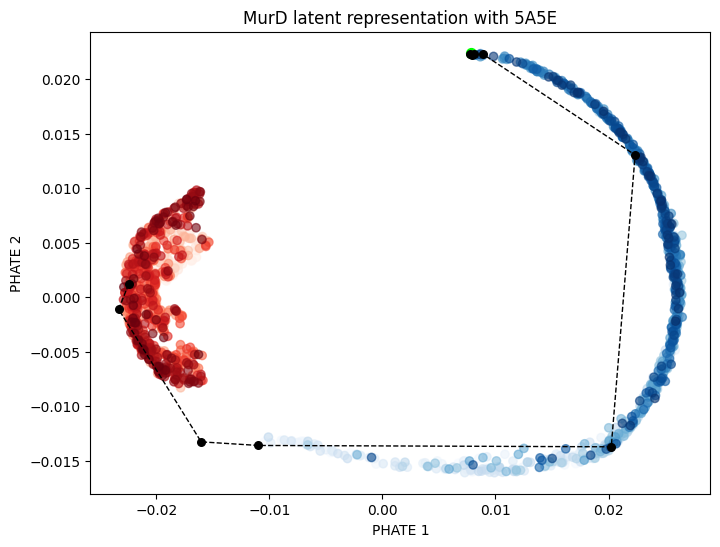

In [30]:
import numpy as np

# Assuming z_open and z_closed are numpy arrays with shapes (900, 64)
print(z_open.shape)
centroid_open = np.array(z_open.mean(axis=0))
centroid_closed = np.array(z_closed.mean(axis=0))
gt_point = z_GT[0]

def lagrange_basis(t, t_points):
    L0 = (t - t_points[1]) * (t - t_points[2]) / ((t_points[0] - t_points[1]) * (t_points[0] - t_points[2]))
    L1 = (t - t_points[0]) * (t - t_points[2]) / ((t_points[1] - t_points[0]) * (t_points[1] - t_points[2]))
    L2 = (t - t_points[0]) * (t - t_points[1]) / ((t_points[2] - t_points[0]) * (t_points[2] - t_points[1]))
    return L0, L1, L2

t_points = [0, 1, 2]
interpolated_points = []

for t in np.linspace(0, 2, 10):
    L0, L1, L2 = lagrange_basis(t, t_points)
    P_t = L0 * centroid_open + L1 * centroid_closed + L2 * z_GT
    interpolated_points.append(P_t)

interpolated_points = np.array(interpolated_points).reshape(10, 64)

import phate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Combine all data points
all_data = np.vstack([z_open, z_closed, z_GT, interpolated_points])

# Visualization using PHATE
phate_operator = phate.PHATE()
z_combined_phate = phate_operator.fit_transform(all_data)



# Split the transformed data back into z_open, z_closed, z_GT, and interpolated points
z_open_phate = z_combined_phate[:len(z_open)]
z_closed_phate = z_combined_phate[len(z_open):len(z_open) + len(z_closed)]
z_GT_phate = z_combined_phate[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]
interpolated_phate = z_combined_phate[len(z_open) + len(z_closed) + len(z_GT):]

# Visualize the latent representation
plt.figure(figsize=(8, 6))
# print(z_GT_phate.shape)
# Plot for z_open with red colormap
scatter1 = plt.scatter(z_open_phate[:, 0], z_open_phate[:, 1], c=times_open, cmap='Reds', alpha=0.6, label='Open')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_closed_phate[:, 0], z_closed_phate[:, 1], c=times_closed, cmap='Blues', alpha=0.6, label='Closed')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=50, label='GT')

# Plot the interpolated points
plt.plot(interpolated_phate[:, 0], interpolated_phate[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed arc line
plt.scatter(interpolated_phate[:, 0], interpolated_phate[:, 1], c='black', s=30)  # Sampled points along the arc

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')
# plt.legend()

plt.show()

Calculating PHATE...
  Running PHATE on 1811 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating optimal t...


    Automatically selected t = 28
  Calculated optimal t in 1.83 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.48 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.57 seconds.
Calculated PHATE in 6.01 seconds.


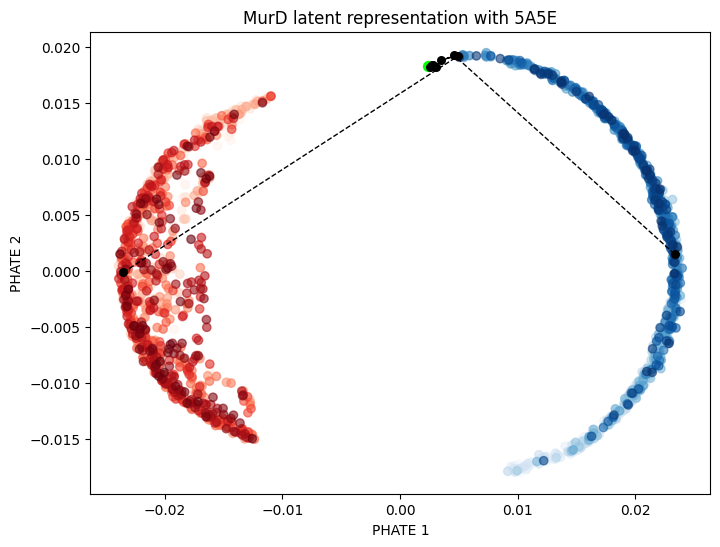

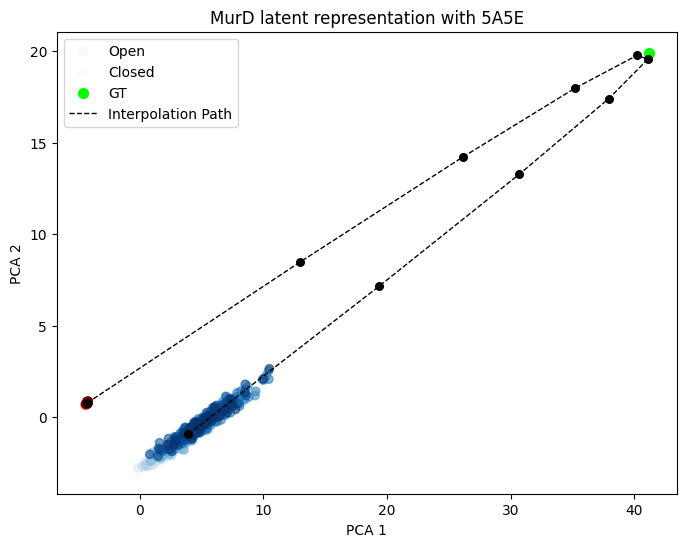

In [104]:
import numpy as np

# Assuming z_open and z_closed are numpy arrays with shapes (900, 64)

centroid_open = np.array(z_open.mean(axis=0))
centroid_closed = np.array(z_closed.mean(axis=0))
gt_point = z_GT_5F[0].numpy()

def lagrange_basis(t, t_points):
    L0 = (t - t_points[1]) * (t - t_points[2]) / ((t_points[0] - t_points[1]) * (t_points[0] - t_points[2]))
    L1 = (t - t_points[0]) * (t - t_points[2]) / ((t_points[1] - t_points[0]) * (t_points[1] - t_points[2]))
    L2 = (t - t_points[0]) * (t - t_points[1]) / ((t_points[2] - t_points[0]) * (t_points[2] - t_points[1]))
    return L0, L1, L2

# t_points = [0, 1, 2]
t_points = [0, 1, 2]
interpolated_points = []

for t in np.linspace(0, 2, 10):
    L0, L1, L2 = lagrange_basis(t, t_points)
    P_t = L0 * centroid_open + L1 * gt_point  + L2 * centroid_closed
    interpolated_points.append(P_t)

interpolated_points = np.array(interpolated_points).reshape(10, 64)

import phate
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Combine all data points
all_data = np.vstack([z_open, z_closed, z_GT_5F, interpolated_points])

# Visualization using PHATE
phate_operator = phate.PHATE()
z_combined_phate = phate_operator.fit_transform(all_data)



# Split the transformed data back into z_open, z_closed, z_GT, and interpolated points
z_open_phate = z_combined_phate[:len(z_open)]
z_closed_phate = z_combined_phate[len(z_open):len(z_open) + len(z_closed)]
z_GT_phate = z_combined_phate[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]
interpolated_phate = z_combined_phate[len(z_open) + len(z_closed) + len(z_GT):]

# Visualize the latent representation
plt.figure(figsize=(8, 6))
# print(z_GT_phate.shape)
# Plot for z_open with red colormap
scatter1 = plt.scatter(z_open_phate[:, 0], z_open_phate[:, 1], c=times_open, cmap='Reds', alpha=0.6, label='Open')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_closed_phate[:, 0], z_closed_phate[:, 1], c=times_closed, cmap='Blues', alpha=0.6, label='Closed')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_phate[:, 0], z_GT_phate[:, 1], c='lime', s=50, label='GT')

# Plot the interpolated points
plt.plot(interpolated_phate[:, 0], interpolated_phate[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed arc line
plt.scatter(interpolated_phate[:, 0], interpolated_phate[:, 1], c='black', s=30)  # Sampled points along the arc

plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('MurD latent representation with 5A5E')
# plt.legend()

plt.show()

pca = PCA(n_components=2)

all_data_pca = pca.fit_transform(all_data)
# Split the transformed data back into z_open, z_closed, z_GT, and interpolated points

z_open_pca = all_data_pca[:len(z_open)]

z_closed_pca = all_data_pca[len(z_open):len(z_open) + len(z_closed)]

z_GT_pca = all_data_pca[len(z_open) + len(z_closed):len(z_open) + len(z_closed) + len(z_GT)]

interpolated_pca = all_data_pca[len(z_open) + len(z_closed) + len(z_GT):]
# Visualize the latent representation

plt.figure(figsize=(8, 6))
# Plot for z_open with red colormap
scatter1 = plt.scatter(z_open_pca[:, 0], z_open_pca[:, 1], c=times_open, cmap = 'Reds', alpha=0.6, label='Open')
# Plot for z_closed with blue colormap
scatter2 = plt.scatter(z_closed_pca[:, 0], z_closed_pca[:, 1], c=times_closed, cmap = 'Blues', alpha=0.6, label='Closed')
# Plot for z_GT with limegreen color
scatter3 = plt.scatter(z_GT_pca[:, 0], z_GT_pca[:, 1], c='lime', s=50, label='GT')

# Plot the interpolated points
plt.plot(interpolated_pca[:, 0], interpolated_pca[:, 1], 'k--', linewidth=1, label='Interpolation Path')  # Dashed arc line

plt.scatter(interpolated_pca[:, 0], interpolated_pca[:, 1], c='black', s=30)  # Sampled points along the arc
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('MurD latent representation with 5A5E')
plt.legend()
plt.show()


In [110]:

centroid_open = np.array(z_open.mean(axis=0))
centroid_closed = np.array(z_closed.mean(axis=0))
gt_point = z_GT_5F[0].numpy()
# print(centroid_open.shape)
# print(gt_point.shape)
# print(centroid_closed.shape)
def lagrange_basis(t, t_points):
    L0 = (t - t_points[1]) * (t - t_points[2]) / ((t_points[0] - t_points[1]) * (t_points[0] - t_points[2]))
    L1 = (t - t_points[0]) * (t - t_points[2]) / ((t_points[1] - t_points[0]) * (t_points[1] - t_points[2]))
    L2 = (t - t_points[0]) * (t - t_points[1]) / ((t_points[2] - t_points[0]) * (t_points[2] - t_points[1]))
    return L0, L1, L2

t_points = [0, 1, 2]
interpolated_points = []

for t in np.linspace(0, 2, 10):
    L0, L1, L2 = lagrange_basis(t, t_points)
    P_t = L0 * centroid_open + L1 * gt_point  + L2 * centroid_closed
    interpolated_points.append(P_t)

print(interpolated_points[0].shape)
print(np.array(interpolated_points).shape)
interpolated_points = np.array(interpolated_points).reshape(10, 64)
# for i in range(100):
#     print(np.linalg.norm(interpolated_points[i] - gt_point))
closest_index = np.argmin(np.linalg.norm(interpolated_points - gt_point, axis=1))

# Get the corresponding interpolated_point
closest_interpolated_point = interpolated_points[closest_index]

# Print the index and the corresponding interpolated_point
print(f"Index of closest interpolated_point to gt_point: {closest_index}")
print(f"Closest interpolated_point to gt_point: {closest_interpolated_point}")
print(gt_point)

(64,)
(10, 64)
Index of closest interpolated_point to gt_point: 5
Closest interpolated_point to gt_point: [  8.162845    -7.1007147   -9.509341   -11.94216      4.993149
   5.486337    -6.097461    -6.2159934   -3.515233     1.7991123
  -4.0434284   -0.26594236  -0.06841718   1.6887327  -10.333035
  -7.374452     9.762873     3.0813937    3.683829    -5.755605
  -5.7586966    8.757737     6.1092105   -7.5475993   -6.786085
   3.658471    -4.371724    -2.8331754    5.6683574    6.4838095
   3.671009     7.740751    10.300864     7.9370346   -2.0089612
  -7.3559294   -5.0017195    9.531006     7.254695     9.812171
   5.5061545    4.393142    -4.719156    -1.7958852    8.142805
   6.285434    -8.209131     4.9993668   -2.23551      1.0186512
  -5.355237     9.985509     7.15679     -4.3360157   -1.6868911
   9.649871    -8.771853     3.0057025   11.066917    -3.5961874
  -6.3702273   -7.554338    -3.1032       5.870076  ]
[  8.161702    -7.067513    -9.54332    -12.012765     5.037195
  

In [112]:
import pickle

# Define the file path to save the pickle file
file_path = 'quadratic_samples_latent_5F_10.pkl'

# Save the variable as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(interpolated_points, file)

In [159]:
# Define the quadratic Bezier curve
def quadratic_interpolant(p1, p2, p3, t):

    return (1-t)**2 * p1 + 2*(1-t)*t * p2 + t**2 * p3

def generate_samples(p1, p2, p3, n):

    t_values = np.linspace(0, 1, n)
    samples = [quadratic_interpolant(p1, p2, p3, t) for t in t_values]
    return np.array(samples)

num_samples = 10
interpolated_points = generate_samples(centroid_open, gt_point, centroid_closed, n=num_samples)
closest_index = np.argmin(np.linalg.norm(interpolated_points - gt_point, axis=1))

# Get the corresponding interpolated_point
closest_interpolated_point = interpolated_points[closest_index]

# Print the index and the corresponding interpolated_point
print(f"Index of closest interpolated_point to gt_point: {closest_index}")
print(f"Closest interpolated_point to gt_point: {closest_interpolated_point}")
print(gt_point)

Index of closest interpolated_point to gt_point: 5
Closest interpolated_point to gt_point: [ 3.0586789  -6.3806653  -2.975327   -2.508946    1.6507176   1.5312376
 -1.7219847  -0.81612176 -1.5943794   0.86044866 -3.513039   -3.5477538
  1.1182566   2.2195237  -5.584398   -4.9580326   7.2276773   4.0135226
  2.6423829  -0.3790303  -3.9701526   4.765183    2.3194928  -6.0203342
 -3.0073743   0.8362705  -3.8243766   1.2139454   1.8448186   2.8952167
  1.8729012   3.7598279   3.732633    7.22547     0.7562752  -1.327503
 -2.4862585   4.847684    4.4051037   3.6506464  -0.99826455  3.3106341
 -2.171851   -2.3806384   5.990283    2.4316747  -5.481254    4.537574
  0.5837459   4.843926   -3.541921    0.7949902   0.8746046  -3.3672643
 -0.5822099   2.493167   -0.3214457   0.1617738   6.9646077   0.6040621
 -1.9628266  -5.1171765  -3.0332239   1.7877351 ]
[ 3.47588    -6.9490156  -3.750941   -4.880933    3.7311692   3.839189
 -2.61019    -4.747529   -3.565653    0.64255965 -3.7193077  -2.909214

In [130]:
import pickle

# Define the file path to save the pickle file
file_path = 'quadratic_two_latent.pkl'

# Save the variable as a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(interpolated_points, file)

# Coordinates Predictions

In [21]:
import pickle as pk
import phate
import torch
import numpy as np
import matplotlib.pyplot as plt
with open('coords_1bx7_notime.pkl', 'rb') as file: 
    # Load the data from the pickle file
    coords = pk.load(file)

In [22]:
with open('1bx7_A_analysis/graphsrog_new.pkl', 'rb') as file:
        full_dataset =  pk.load(file)
# full_dataset = full_dataset[:1000]
for data in full_dataset:
        y = float(data.y)
        data.y = y
    
# import pdb; pdb.set_trace()
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.coords for data in val_set])

/tmp/ipykernel_2774310/453155242.py:12: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  test_targets = np.array([data.coords for data in val_set])
/tmp/ipykernel_2774310/453155242.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_targets = np.array([data.coords for data in val_set])


In [ ]:
from deshaw_processing.de_shaw_Dataset import DEShaw
full_dataset = DEShaw('deshaw_processing/graphs_gb3/total_graphs.pkl')
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.coords for data in val_set])

In [23]:
test_targets

array([tensor([[[ 0.0000,  0.0000],
                [ 0.5427,  0.0000],
                [ 0.7389,  0.0000],
                ...,
                [ 3.3618,  1.0434],
                [ 3.6111,  1.1987],
                [ 3.5135,  1.4070]],

               [[ 0.5427,  0.0000],
                [ 0.0000,  0.0000],
                [ 0.4225,  0.0000],
                ...,
                [ 3.4188, -3.0012],
                [ 3.6123, -2.9111],
                [ 3.4509, -2.7818]],

               [[ 0.7389,  0.0000],
                [ 0.4225,  0.0000],
                [ 0.0000,  0.0000],
                ...,
                [ 3.0984, -1.4045],
                [ 3.2764, -1.5486],
                [ 3.1143, -1.6054]],

               ...,

               [[ 3.3618,  1.0434],
                [ 3.4188, -3.0012],
                [ 3.0984, -1.4045],
                ...,
                [ 0.0000,  0.0000],
                [ 0.4235,  0.0000],
                [ 0.7677,  0.0000]],

               [[ 3.611

In [24]:
coords = torch.cat(coords, dim=0)

In [25]:
coords.shape

torch.Size([201, 55, 55, 2])

# Heatmaps

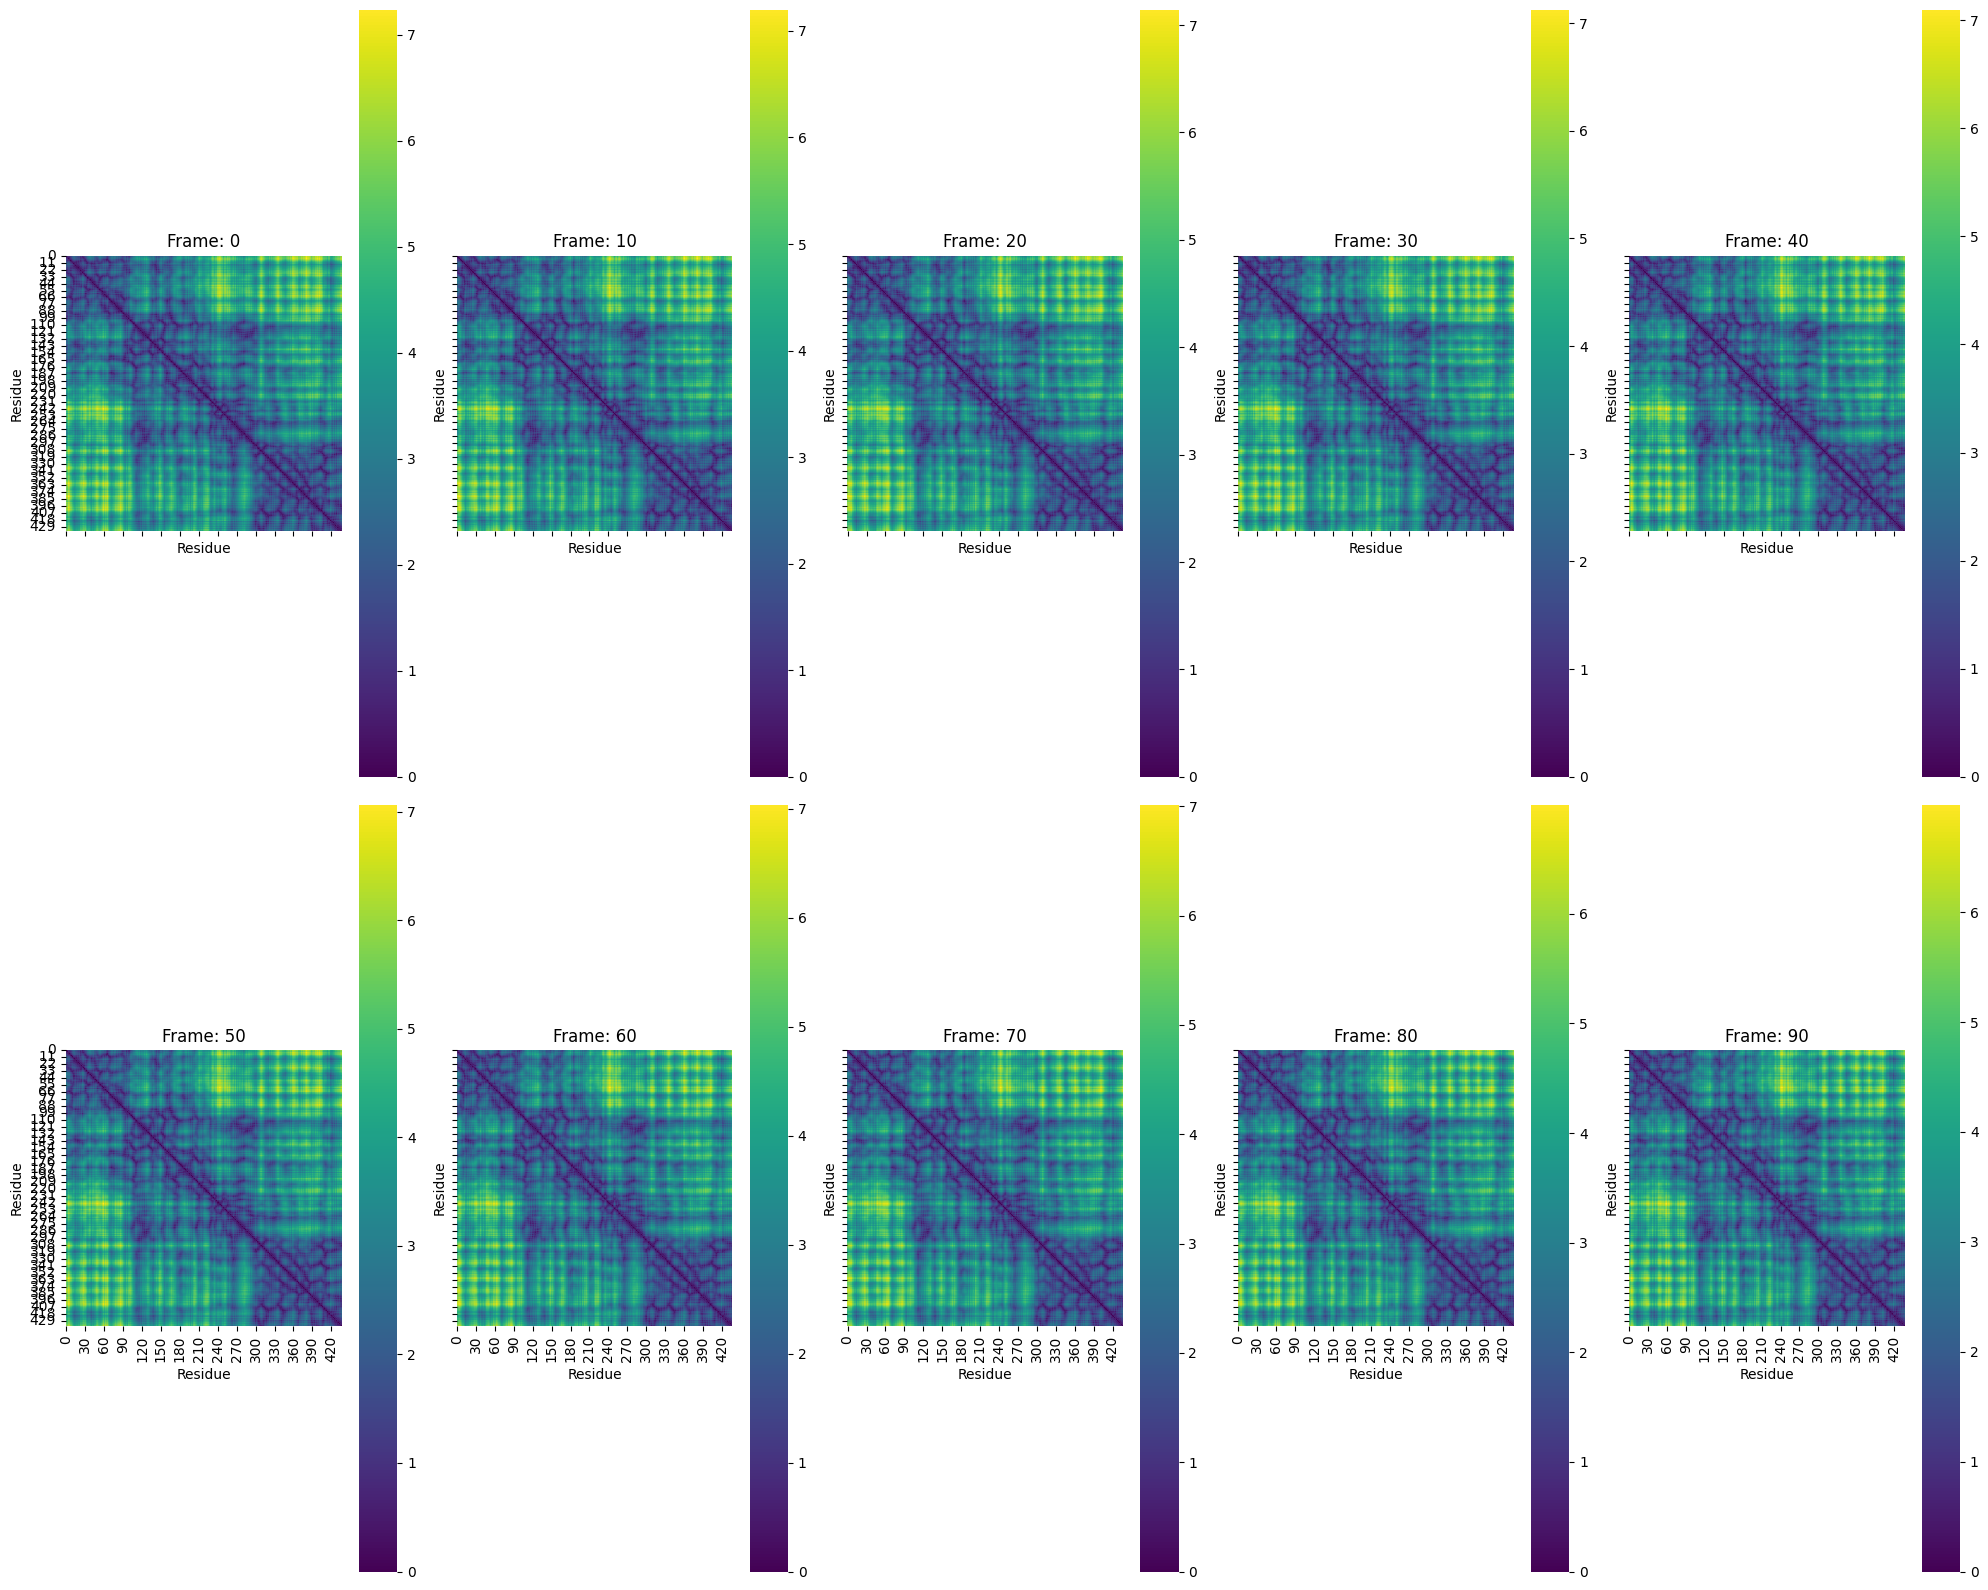

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example random data for demonstration
# Replace this with your actual data
coordinates = coords  # Example random data for coordinates

# Function to compute pairwise distance matrix
def compute_distance_matrix(coords):
    num_residues = coords.shape[0]
    dist_matrix = np.zeros((num_residues, num_residues))
    for i in range(num_residues):
        for j in range(num_residues):
            dist_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])
    return dist_matrix

# Select every 10th interpolant out of the 100
selected_frames = range(0, 100, 10)

# Set up the figure for plotting heatmaps
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16), sharex=True, sharey=True)

# Generate and plot heatmaps
for idx, frame in enumerate(selected_frames):
    row = idx // num_cols
    col = idx % num_cols
    coords = coordinates[frame]
    dist_matrix = compute_distance_matrix(coords)
    sns.heatmap(dist_matrix, ax=axes[row, col], cmap='viridis', square=True, cbar=True)
    axes[row, col].set_title(f'Frame: {frame}')
    axes[row, col].set_xlabel('Residue')
    axes[row, col].set_ylabel('Residue')

# # Add a common colorbar to the far right
# fig.subplots_adjust(right=0.85)  # Adjust right margin to make room for colorbar

# # Create a separate figure for the colorbar
# fig_colorbar = plt.figure(figsize=(1, 6))  # Adjust the size as needed
# cbar = plt.colorbar(axes[0, 0].collections[0], ax=fig_colorbar.add_subplot(111))
# cbar.set_label('Distance')  # Label for the colorbar

# Adjust layout for the heatmap figure
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Assuming your coordinates tensor is stored in a variable called `coordinates`
# coordinates is a numpy array of shape (100, 437, 3)

# Sample data for demonstration (replace this with your actual data)
coordinates = coords

# Setup the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the scatter plot
sc = ax.scatter(coordinates[0, :, 0], coordinates[0, :, 1], coordinates[0, :, 2])

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Function to update the scatter plot for each frame
def update(frame):
    sc._offsets3d = (coordinates[frame, :, 0], coordinates[frame, :, 1], coordinates[frame, :, 2])
    return sc,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(coordinates.shape[0]), interval=100)

# Save the animation as a movie file (optional)
ani.save('3d_animation.mp4', writer='ffmpeg', fps=10)

# Show the plot
plt.show()


In [26]:
test_targets.shape

(201,)

In [27]:
tensor_list = list(test_targets)

# Stack the tensors along a new dimension (dimension 0)
test_targets = torch.stack([t for t in tensor_list], dim=0)

In [28]:
test_targets.shape

torch.Size([201, 55, 55, 2])

In [29]:
coords[:,:,:,0].shape

torch.Size([201, 55, 55])

Frob norm between distance matrices ground truth and predicted

In [30]:
frobenius_norm_distances = torch.norm(coords[:,:,:,0] - test_targets[:,:,:,0], p='fro')
print(f"Frobenius norm between pairwise distances: {frobenius_norm_distances/len(coords)}")
frobenius_norm_dihedral = torch.norm(coords[:,:,:,1] - test_targets[:,:,:,1], p='fro')
print(f"Frobenius norm between dihedral angles: {frobenius_norm_dihedral/len(coords)}")

Frobenius norm between pairwise distances: 0.7977384328842163
Frobenius norm between dihedral angles: 4.304844856262207


# PCC/SCC

In [18]:
def calculate_pearson_correlation(X, Y):
    """
    Calculate the Pearson correlation coefficient separately for each dimension (X, Y, Z) across all graphs in the test set.

    Args:
        X: numpy array of shape (N, M, D), where N is the number of graphs, M is the number of residues/nodes,
           and D is the number of dimensions containing predicted coordinates.
        Y: numpy array of shape (N, M, D), where N is the number of graphs, M is the number of residues/nodes,
           and D is the number of dimensions containing ground truth coordinates.

    Returns:
        pearson_corr: numpy array of shape (D,) containing the Pearson correlation coefficient for each dimension.
    """
    N, M, D = X.shape
    pearson_corr = np.zeros(D)

    for d in range(D):
        X_d = X[:, :, d].flatten()
        Y_d = Y[:, :, d].flatten()
        pearson_corr[d] = np.corrcoef(X_d, Y_d)[0, 1]

    return pearson_corr


In [51]:
pearson_corr = calculate_pearson_correlation(coords, test_targets)
print("Pearson Correlation Coefficient:", pearson_corr)


Pearson Correlation Coefficient: [0.98768434 0.88747316 0.94322405]


In [120]:
def eucl_dist_corrs(coords_1, 
                        coords_2, 
                        squared=False):
        """
        For two sets of coordinates, calculate the Pearson correlation 
        coefficient (PCC) between their two intra-set euclidean distances, 
        optionally squared.
        """
        from sklearn.metrics.pairwise import euclidean_distances
        from scipy.stats import spearmanr
        
        dists = [None] * 2
        for i, coords in enumerate((coords_1, coords_2)):
            dist = euclidean_distances(coords, coords)
            # exclude self-distances and duplicates (i,j-th = j,i-th distance)
            # -> create lower triangular mask excluding diagonal
            tril_mask = np.tril_indices_from(dist, k=-1)
            dist = dist[tril_mask]
            if squared:
                dist = np.square(dist)
            dists[i] = dist
        # calc the 2x2 corr matrix, and return the top off-diagonal
        pcc = np.corrcoef(dists[0], dists[1])[0, 1]
        scc = spearmanr(dists[0], dists[1])
        return pcc, scc


In [121]:
coords = [coords[i:i+1] for i in range(coords.size(0))]

In [122]:
coords[2]

tensor([[[7.4936, 4.8671, 5.8192],
         [7.5482, 4.9608, 5.7103],
         [7.3379, 4.9985, 5.3762],
         ...,
         [1.9820, 5.8791, 4.2519],
         [1.8745, 5.5076, 4.1480],
         [1.6839, 5.4102, 4.4407]]])

In [100]:
coords[99]

tensor([[[7.5390, 4.9322, 5.8519],
         [7.5158, 4.9522, 5.7024],
         [7.3347, 5.0007, 5.3208],
         ...,
         [2.4131, 6.0721, 3.6837],
         [2.2728, 5.6411, 3.5374],
         [1.9773, 5.6299, 3.7853]]])

In [125]:
all_pcc = []
out_pcc = []
pcc_lst = []
for j in range(10):
    for i in range(coords[j].shape[0]):
        pcc, scc = eucl_dist_corrs(coords[j][i], test_targets[i])
        print("PCC: ", pcc)
        # print(scc)
        pcc_lst.append(pcc)
    # print(pcc_lst)
    # out_pcc.append(np.mean(pcc_lst))

# print(pcc_lst[50])
print("MAX:")
print(max(pcc_lst))
max_index = max(range(len(pcc_lst)), key=pcc_lst.__getitem__)
print(f"The index of the maximum value is: {max_index}")
# pcc, scc = eucl_dist_corrs(coords, test_targets)

PCC:  0.9885311212979901
PCC:  0.9912412014321358
PCC:  0.989204937670685
PCC:  0.9884439750551424
PCC:  0.9880050945909975
PCC:  0.9878936568810787
PCC:  0.9882831057797973
PCC:  0.9888528055676912
PCC:  0.9907358734936763
PCC:  0.9908791831723155
MAX:
0.9912412014321358
The index of the maximum value is: 1


In [40]:
tensor_list = list(test_targets)

# Stack the tensors along a new dimension (dimension 0)
test_targets = torch.stack([t for t in tensor_list], dim=0)

TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [40]:
test_targets.shape

(1, 437, 3)

# RMSD

In [126]:

def est_atomic_pdb_from_residue_coords(orig_frame, 
                                       new_residue_coords,
                                       orig_residue_coords=None):
    """
    Generates a new mdtraj trajectory frame with all atoms within residues
    shifted by the differences between an original and new frame's center-of-
    residues' x, y, and z coordinates.

    This allows us to estimate atomic positions from new residue positions, and
    hence use functions/metrics designed for atom-level pdb files. HOWEVER, we
    aren't necessarily getting the true atomic coordinates this way: some residues
    are flexible, by definition we've coarsened to residue granularity, etc.
    """
    import mdtraj as md

    
    # calc differences in residue centers between preds and orig frame
    # (caution: relies on broadcasting (n_residue, 3)-shaped arrays)
    ctr_diff = new_residue_coords - orig_residue_coords
    # print(ctr_diff, '\nshape:', ctr_diff.shape)
    
    # shift orig frame atom coords by residue diffs
    pred_residue_ctr_coords = [None] * orig_frame.n_residues
    for j, residue in enumerate(orig_frame.top.residues):
        # print(f'residue {j}')
        atom_indices = [atom.index for atom in residue.atoms]
        # print(atom_indices)
        # note that orig_frame.xyz[0].shape = (n_atoms, 3)
        atom_coords = orig_frame.xyz[0][atom_indices]
        # print(atom_coords)
    
        shift_atom_coords = atom_coords + ctr_diff[j]
        # print(shift_atom_coords, '\n')
        pred_residue_ctr_coords[j] = shift_atom_coords
    pred_residue_ctr_coords = np.row_stack(pred_residue_ctr_coords)
    
    # make a copy of the orig frame and replace its atom coords
    new_frame = orig_frame.slice(0, copy=True)
    new_frame.xyz[0] = pred_residue_ctr_coords
    return new_frame

In [127]:
def get_residue_coords(frame):
    """
    Computes a numpy array of residues' xyz-coordinates from
    an mdtraj trajectory frame.
    """
    residue_ctr_coords = [None] * frame.n_residues
    for j, residue in enumerate(frame.top.residues):
        atom_indices = [atom.index for atom in residue.atoms]
        # note that frame.xyz[0].shape = (n_atoms, 3)
        atom_coords = frame.xyz[0][atom_indices] 
        mean_coords = np.mean(atom_coords, axis=0)
        residue_ctr_coords[j] = mean_coords
    residue_ctr_coords = np.row_stack(residue_ctr_coords)
    return residue_ctr_coords

In [128]:
def get_deshaw_data_info(deshaw_folderpath):
    """
    DE Shaw pdb files are in a weird folder structure
    and filenaming convention. This function walks
    through a DE Shaw data folder and generates a
    dictionary of lists holding useful file info, all
    in the order of the sorted MD simulation timesteps.
    """
    # deshaw pdb files are grouped in subfolders
    deshaw_subfolders = sorted([
        f.path for f in os.scandir(deshaw_folderpath) \
        if f.is_dir()
    ])
    n_subf = len(deshaw_subfolders)
    records = {
        'pdb_filepaths': [],
        'suffix_vals': [],
        'timestamps': []
    }
    subf_records_l = [None] * n_subf
    
    # extract info from each pdb file, by subfolder
    for j, deshaw_subf in enumerate(deshaw_subfolders):
        subf_files = os.listdir(deshaw_subf)
        n = len(subf_files)
        subf_records = {
            'pdb_filepaths': [None] * n,
            'suffix_vals': [None] * n,
            'timestamps': [None] * n
        }
        
        for i, pdb_filename in enumerate(subf_files):
            a, b = pdb_filename.split('_')
            a, val = b.split('-')
            suffix_val = val.split('.')[0]
            # int(suffix_val) is 0-2 microseconds
            t = (int(a) * 1e4 + int(suffix_val)) / 1e4
            # print(t)
            subf_records['pdb_filepaths'][i] = f'{deshaw_subf}/{pdb_filename}'
            subf_records['suffix_vals'][i] = suffix_val
            subf_records['timestamps'][i] = t
        
        # sort subfolder info lists in timestamp order
        for k, v in subf_records.items():
            subf_records[k] = [
                x for (_, x) \
                in sorted(zip(
                    subf_records['timestamps'], 
                    subf_records[k]
                ))
            ]
        subf_records_l[j] = subf_records
    
    # create master records dict (all in sorted timestamp order)
    for k in records.keys():
        for sr in subf_records_l:
            records[k].extend(sr[k])
    return records

In [129]:
import os

In [130]:
coords[0].shape

torch.Size([1, 437, 3])

In [131]:
# import mdtraj on first call
import mdtraj as md

# batch_rmsds = [None] * batch_size
# batch_sasas = [None] * batch_size
# batch_rgs = [None] * batch_size
# batch_dopes = [None] * batch_size
# deshaw_records = get_deshaw_data_info("/gpfs/gibbs/pi/krishnaswamy_smita/de_shaw/GB3")

# traj = md.load(deshaw_records['pdb_filepaths'])
# traj = md.load('1ptq_A_analysis/1ptq_A_R1.xtc', top='1ptq_A_analysis/1ptq_A.pdb')
traj = md.load('MurD/5A5F_full.pdb')
rmsd_list = []

for j in range(10):
    for i in range(coords[j].shape[0]):
    # grab on sample's coords from batch of samples
    # res_coords = batch_residue_coords[i, :, :].numpy()
    # timestep_id = timestep_ids[i]
        # print(i)
    # ref_frame = self.ref_trajectory[timestep_id]
        ref_frame =  traj[i]
        ref_frame_residue_coords = get_residue_coords(ref_frame)
        # print(coords[i].shape)
        # print(ref_frame_residue_coords.shape)
        atomic_frame = est_atomic_pdb_from_residue_coords(
            orig_frame=ref_frame, 
            new_residue_coords=coords[j][i].numpy(),
            orig_residue_coords=ref_frame_residue_coords
        )
        # print(coords[j][i])
        # RMSD
        rmsd = md.rmsd(target=atomic_frame, reference=ref_frame)
        print(rmsd)
        # atomic_frame.save_pdb(f"MurD/new_interpolants_100/interpolant_atomic_frame_{j}.pdb")
        rmsd_list.append(rmsd)

print("MIN:")
print(min(rmsd_list))
max_index = min(range(len(rmsd_list)), key=rmsd_list.__getitem__)
print(f"The index of the minimum value is: {max_index}")
rmsd_list = np.array(rmsd_list)
# Take the mean
# print(np.mean(rmsd_list))
#     batch_rmsds[i] = rmsd.item()

/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:198: RuntimeWarning: divide by zero encountered in divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


[0.27696854]
[0.22836266]


[0.25584918]
[0.2637581]
[0.26883593]
[0.2700184]
[0.26468045]
[0.25756028]
[0.23178826]
[0.23460978]
MIN:
[0.22836266]
The index of the minimum value is: 1


In [17]:
rmsd_list.mean()

0.21834613

# DOPE

In [132]:
import os

In [133]:
from baselines.Baseline_1.metrics.metrics_fns import calc_dope_scores

In [134]:
# import mdtraj on first call
import mdtraj as md

# batch_rmsds = [None] * batch_size
# batch_sasas = [None] * batch_size
# batch_rgs = [None] * batch_size
# batch_dopes = [None] * batch_size
# deshaw_records = get_deshaw_data_info("/gpfs/gibbs/pi/krishnaswamy_smita/de_shaw/GB3")

# traj = md.load(deshaw_records['pdb_filepaths'])
# traj = md.load('1ptq_A_analysis/1ptq_A_R1.xtc', top='1ptq_A_analysis/1ptq_A.pdb')
traj = md.load('MurD/5A5F_full.pdb')
# rmsd_list = []
dope_list = []
for j in range(10):
    for i in range(coords[j].shape[0]):
        # grab on sample's coords from batch of samples
        # res_coords = batch_residue_coords[i, :, :].numpy()
        # timestep_id = timestep_ids[i]
        
        # ref_frame = self.ref_trajectory[timestep_id]
        ref_frame =  traj[i]
        ref_frame_residue_coords = get_residue_coords(ref_frame)
        # print(coords[i].shape)
        # print(ref_frame_residue_coords.shape)
        atomic_frame = est_atomic_pdb_from_residue_coords(
            orig_frame=ref_frame, 
            new_residue_coords=coords[j][i].numpy(),
            orig_residue_coords=ref_frame_residue_coords
        )
        # RMSD
        # rmsd = md.rmsd(target=atomic_frame, reference=ref_frame)
        # print(rmsd)
        # atomic_frame.save_pdb(f"1ptq_gt_pdb/gt_atomic_frame_{i}.pdb")
        # rmsd_list.append(rmsd)
        #DOPE
        dope = calc_dope_scores(atomic_frame.xyz[0], ref_frame, tmp_pdb_savepath=f"5a5e_tmp_pdbs/", normalize=True, verbosity=0)
        print(dope)
        dope_list.append(dope)

# rmsd_list = np.array(rmsd_list)
#Take the mean
# print(np.mean(rmsd_list))
    # batch_rmsds[i] = rmsd.item()
print("MIN:")
print(min(dope_list))
max_index = min(range(len(dope_list)), key=dope_list.__getitem__)
print(f"The index of the minimum value is: {max_index}")
# rmsd_list = np.array(rmsd_list)

3827.322791553111
3939.5329418827473
3975.3734978236525
4023.0222878613163
4050.5399365217036
4067.9373992634205
4080.409443396416
4071.6551244175425
4049.5192637657897
4034.776717043028
MIN:
3827.322791553111
The index of the minimum value is: 0


In [17]:
np.mean(dope_list)

1078.3036960212703

/tmp/ipykernel_1599792/1759643921.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


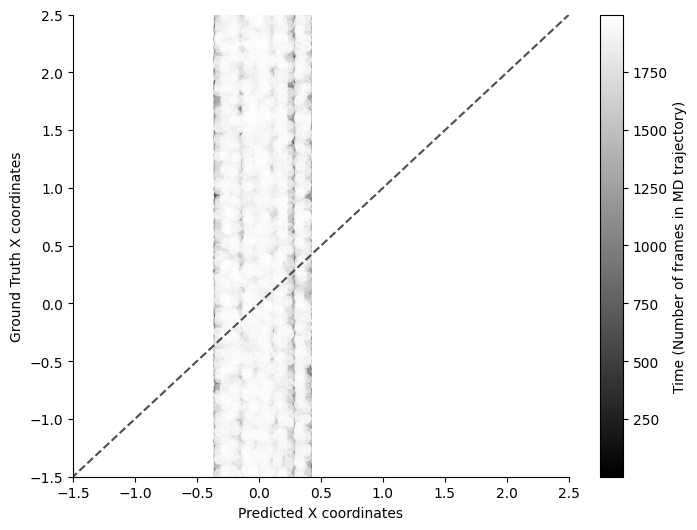

In [25]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 1997))

# Loop over all graphs
for i in range(1997):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 0], y=test_targets[i, :, 0], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 2.5)
plt.xlabel("Predicted X coordinates")
plt.ylabel("Ground Truth X coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=1997))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


/tmp/ipykernel_2635676/2051250930.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


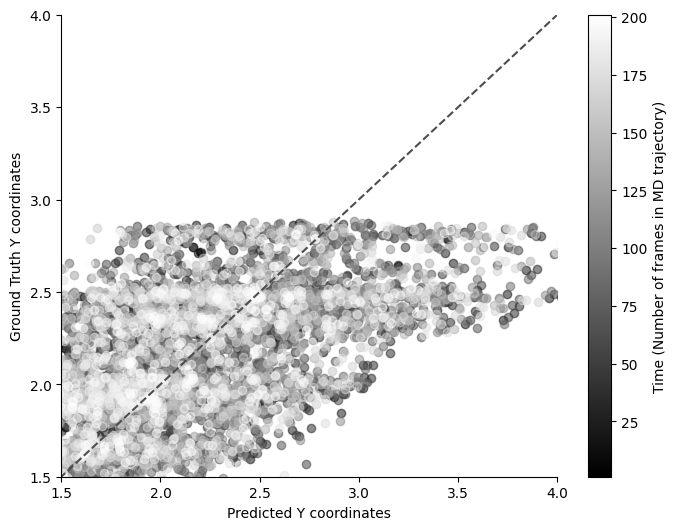

In [17]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 1], y=test_targets[i, :, 1], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted Y coordinates")
plt.ylabel("Ground Truth Y coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


/tmp/ipykernel_2635676/2418739173.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


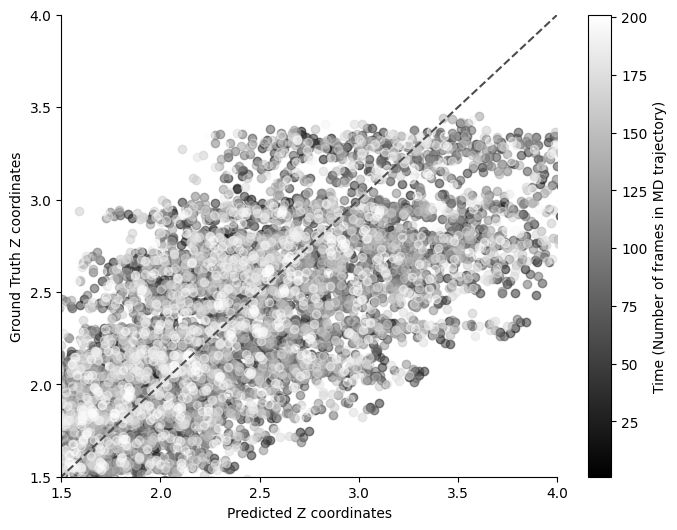

In [18]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 2], y=test_targets[i, :, 2], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted Z coordinates")
plt.ylabel("Ground Truth Z coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


In [3]:
import numpy as np

m = [0.92643731, 0.94558806, 0.94772572]
s = [0.11067783, 0.08539494, 0.08090701]

mean = np.mean(m)
std_dev = np.mean(s)

result = f"Mean: {mean:.6f} +/- {std_dev:.6f}"
print(result)

Mean: 0.939917 +/- 0.092327


# Attention Maps

In [8]:
with open('../attention_maps_gb3.pkl', 'rb') as file:
    # Load the data from the pickle file
    row_attn = pk.load(file)

In [7]:
row_attn[15][0].shape

torch.Size([41, 1, 55, 55])

torch.Size([1600, 56, 56])
tensor([8.4106e-06, 7.6835e-06, 5.2488e-06, 2.1410e-06, 1.6475e-06, 1.8787e-06,
        2.4875e-06, 1.7295e-06, 7.6100e-07, 7.7924e-07, 8.1696e-07, 5.4727e-07,
        6.0870e-07, 6.0639e-07, 1.8012e-06, 2.1711e-06, 2.6672e-06, 2.5962e-06,
        1.6185e-06, 1.5177e-06, 1.1845e-06, 8.9547e-07, 1.1447e-06, 1.8149e-06,
        1.9002e-06, 1.7624e-06, 1.6695e-06, 7.8867e-07, 1.0209e-06, 1.7744e-06,
        1.9988e-06, 6.3730e-06, 1.1674e-05, 1.4351e-05, 2.3459e-05, 2.4851e-05,
        3.3606e-05, 1.6886e-05, 2.7357e-05, 2.3008e-05, 1.9799e-05, 6.1370e-05,
        1.3089e-04, 1.5174e-04, 1.4140e-04, 6.4902e-05, 7.9035e-05, 3.2737e-04,
        3.8736e-03, 4.1322e-02, 3.7469e-01, 5.5369e-01, 9.4725e-02, 9.5961e-03,
        1.4794e-03, 8.9307e-04])
Max vector saved to max_vector_gb3.csv


<Axes: >

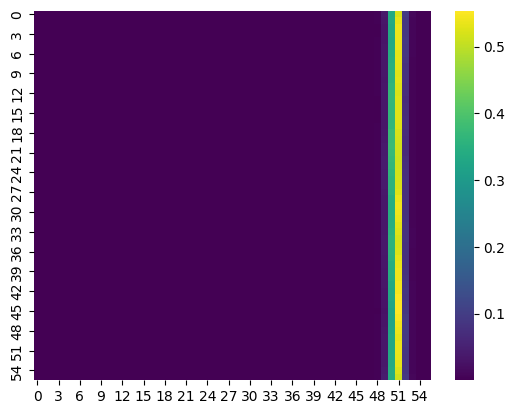

In [9]:
import pickle as pk
import seaborn as sns
import torch
import pickle as pk
import seaborn as sns

# Load the data from the pickle file
with open('../attention_maps_gb3.pkl', 'rb') as file:
    row_attn = pk.load(file)

row_attn_tensor = row_attn[0][0]
# Get the shape of the attention maps
row_attn_shape = row_attn_tensor.shape

# Create an empty tensor
result_tensor = torch.empty((0,) + row_attn_shape[1:], dtype=row_attn_tensor.dtype)

# Iterate over the range and add row_attn[i][0] to the result_tensor
for i in range(16):
    result_tensor = torch.cat((result_tensor, row_attn[i][0]))

result_tensor = result_tensor.squeeze(1)
# Print the result_tensor
print(result_tensor.shape)

result_tensor = torch.mean(result_tensor, dim=0)

max_vector = torch.max(result_tensor, dim=0)[0]
print(max_vector)
import csv

# Define the file path
file_path = 'max_vector_gb3.csv'

# Define the data to be saved
data = [(i+1, score.item()) for i, score in enumerate(max_vector)]

# Save the data to the CSV file
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Residue Number', 'Attention Score'])
    writer.writerows(data)

print(f"Max vector saved to {file_path}")
# Calculate the mean attention map
# attention_maps = [i[0].mean(dim=0) for i in result_tensor]

# Plot the first attention map
sns.heatmap(result_tensor, cmap='viridis')


# Dirchlet Energy of Graph from Latent Representations

In [15]:
import graphtools as gt
import numpy as np
from pygsp import graphs
import pickle as pk
# Load the latent representation file
latent_file = '../latent_embeddingsbpti.pkl'
with open(latent_file, 'rb') as file:
    z_rep = pk.load(file)

with open('../times_bpti.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

print(len(times))
# Convert the latent representation to a numpy array
z_rep = np.concatenate(z_rep, axis=0)

# Define the number of nearest neighbors (k) for the kNN graph
k = 10

# Compute the kNN graph
knn_graph = graphs.NNGraph(z_rep, k=k, rescale=False)

# Compute the Laplacian matrix
laplacian_matrix = knn_graph.L
# Compute the Dirichlet energy
feature_vector = times  # Example feature vector (should this be time?)
dirichlet_energy = np.dot(feature_vector, laplacian_matrix.dot(feature_vector))

# Normalize by dividing by x^T x
feature_norm = np.dot(feature_vector, feature_vector)
dirichlet_energy_normalized = dirichlet_energy / feature_norm

print("Dirichlet Energy (Normalized):", dirichlet_energy_normalized)

# print("Dirichlet Energy:", dirichlet_energy)

9985


2024-05-22 11:43:44,822:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


Dirichlet Energy (Normalized): 2.1016392593069013
